## **Practical Lab 3 - Vanilla CNN and Fine-Tune VGG16 - for Dogs and Cats Classification**

**Name:** Mandeep Singh Brar        
**Student ID:** 8989367     
**Course Name:** Foundations of Machine Learning Frameworks         
**Course No:** CSCN8010 


### **Introduction**

In this lab, I will explore the task of image classification by building a model that can distinguish between images of dogs and cats. 

To understand the strengths of different modeling approaches, I will implement two models:

- A Vanilla CNN built from scratch to grasp the core mechanics of convolutional networks.

- A Fine-Tuned VGG16 model that applies transfer learning using pre-trained ImageNet weights.

Through this process, I aim to deepen my understanding of deep learning workflows, including data preprocessing, model training, evaluation, and fine-tuning. I will evaluate both models using accuracy, precision, recall, F1-score, and confusion matrix to determine which approach performs best for this binary classification task.

#### **Step 1: Obtain the Dataset (Dogs vs. Cats)**

I downloaded the Dogs vs. Cats dataset from Kaggle, available here: https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats

The full dataset contains 25,000 images, but for the purpose of this lab—and in line with the provided class notebook—I only need a subset of 5,000 images, equally balanced between dogs and cats for training, validation, and testing.

#### **Step 2: Extract and Organize the Dataset**        

After downloading the train.zip file, I extracted it into a folder of my choice.

In [1]:
import os, shutil, pathlib
from pathlib import Path

# Define paths for the original dataset and the destination for the smaller subset
original_dir = pathlib.Path("Data/train")  # Folder containing all 25,000 original images
new_base_dir = pathlib.Path("Data/cats_vs_dogs")  # Folder where the smaller, organized dataset will be saved

# Function to create subsets (train, validation, test) from the full dataset
def make_subset(subset_name, start_index, end_index):
    print(f"\n Creating subset: {subset_name} ({start_index} to {end_index - 1})")
    print("----")

    # Loop over both categories: cats and dogs
    for category in ("cat", "dog"):
        # Create the directory for the current subset and category if it doesn’t exist
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)

        # Generate file names like 'cat.0.jpg', 'dog.1001.jpg', etc.
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        copied = 0  # Counter to track number of copied files

        # Copy each image from the original dataset to the new directory
        for fname in fnames:
            src = original_dir / fname
            dst = dir / fname
            if src.exists():
                shutil.copyfile(src, dst)
                copied += 1
            else:
                # Warn if a file in the expected range is missing
                print(f"Warning: {fname} not found in {original_dir}")

        print(f"Copied {copied} images to '{subset_name}/{category}'")

# Run the function for each subset: train (1000 per class), validation (500 per class), test (1000 per class)
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

print("\n")
print(" Dataset split completed successfully.")



 Creating subset: train (0 to 999)
----
Copied 1000 images to 'train/cat'
Copied 1000 images to 'train/dog'

 Creating subset: validation (1000 to 1499)
----
Copied 500 images to 'validation/cat'
Copied 500 images to 'validation/dog'

 Creating subset: test (1500 to 2499)
----
Copied 1000 images to 'test/cat'
Copied 1000 images to 'test/dog'


 Dataset split completed successfully.


### **EDA: Explore the data with relevant graphs, statistics and insights**

#### **Step 1: Dataset Structure and Class Distribution**

In this step, I summarize the number of images in each class (cats and dogs) across all three subsets: training, validation, and test. This helps confirm that the dataset is balanced, which is essential for training unbiased models.

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Function to count images in each subset and class
def summarize_dataset(new_base_dir):
    data = {"Subset": [], "Class": [], "Image Count": []}
    for subset in ["train", "validation", "test"]:
        for cls in ["cat", "dog"]:
            path = new_base_dir / subset / cls
            count = len(os.listdir(path))
            data["Subset"].append(subset.capitalize())
            data["Class"].append(cls.capitalize())
            data["Image Count"].append(count)
    return pd.DataFrame(data)

# Generate summary DataFrame
df_summary = summarize_dataset(new_base_dir)
df_summary


,Subset,Class,Image Count
0,Train,Cat,1000
1,Train,Dog,1000
2,Validation,Cat,500
3,Validation,Dog,500
4,Test,Cat,1000
5,Test,Dog,1000


#### **Step 2: Visual Inspection of Sample Images**
Here, I randomly visualize a few images from each class to gain an understanding of the image content, quality, and visual diversity. This is useful for spotting potential issues or biases before preprocessing.

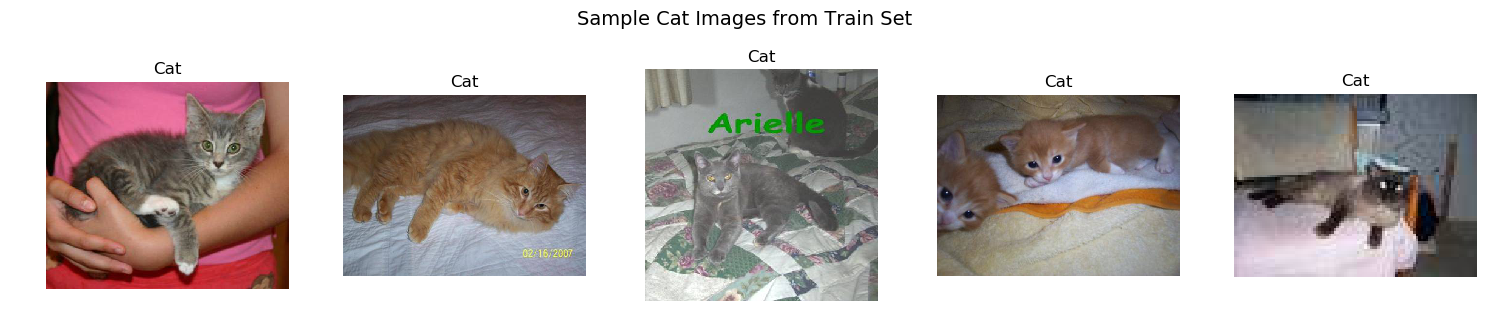

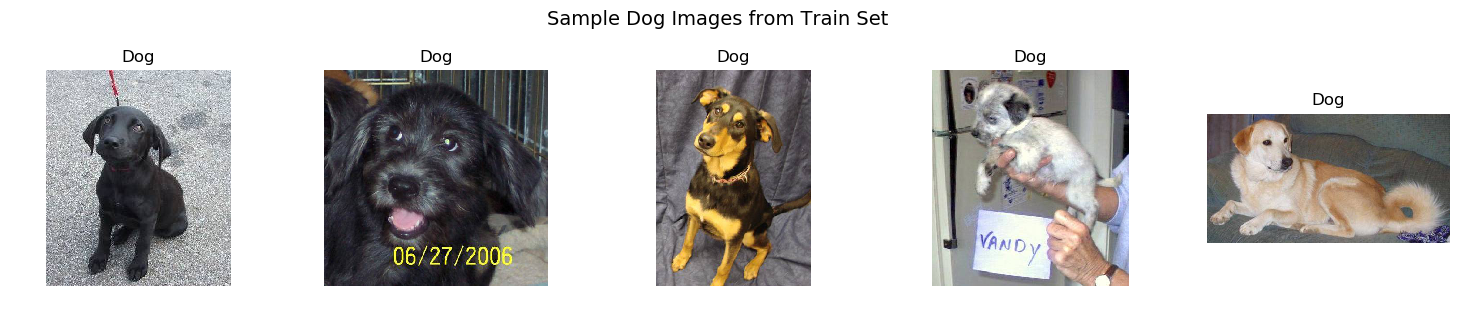

In [3]:
import matplotlib.image as mpimg
import random

# Function to show 5 random training images from a specified label
def show_images(label):
    
    # Path to training images for the given label
    img_folder = os.path.join(new_base_dir, 'train', label)
    img_files = random.sample(os.listdir(img_folder), 5)

    # Create a figure and plot the images in a row
    plt.figure(figsize=(15, 3))
    for i, img_name in enumerate(img_files):
        img_path = os.path.join(img_folder, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(label.capitalize())
        plt.axis('off')

    # Add title and spacing between title and plots
    plt.suptitle(f"Sample {label.capitalize()} Images from Train Set", fontsize=14, y=1.05)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Adjust vertical space for suptitle
    plt.show()

# 🔍 Show samples from both classes
show_images('cat')
show_images('dog')


#### **Step 3: Image Dimension Distribution**
This step analyzes the width and height of sample images to determine if resizing is necessary. Since CNNs require fixed input sizes, it's important to assess and standardize image dimensions.

#### **Step 4: Brightness Analysis**
I convert images to grayscale and calculate average brightness values. This helps evaluate whether lighting conditions vary drastically across images, which could affect model performance if not handled properly.

#### **Data Augmentation with ImageDataGenerator**

#### **Step 5: Previewing Augmented Images**
To improve generalization and avoid overfitting, I apply augmentation techniques like rotation, flipping, zooming, and shifting. This step visually demonstrates the impact of augmentation using ImageDataGenerator from Keras.

**Summary of EDA:**      
This section summarizes all key observations from the EDA process, including dataset balance, image variety, dimensional consistency, brightness levels, and the benefits of augmentation. These insights validate that the dataset is ready for the modeling phase.